## **Menggunakan Data dalam Neural Network**

Ketika menggunakan data, **jenis data apa yang menurut Anda bisa diberikan ke dalam neural network?** Jawabannya tentu saja adalah **angka** seperti _float_. Ini karena setiap neuron dalam neural network melakukan operasi **perkalian** dan **penjumlahan** pada **weight** dan **bias** untuk memproses data input tersebut.


Namun, **data dalam kehidupan nyata** sering kali berisi data non-numerik, seperti **string** atau data yang meskipun direpresentasikan oleh angka, mungkin tidak memiliki keterkaitan langsung dengan nilai angka tersebut. Misalnya, data **kategorikal**.

### **Memanfaatkan tf.data API**

**tf.data API** memungkinkan Anda untuk membangun **input pipeline** yang kompleks dari bagian-bagian sederhana yang dapat digunakan kembali. Sebagai contoh:

- **Pipeline untuk model gambar** mungkin mengumpulkan data dari file pada sistem file terdistribusi, menerapkan _random perturbations_ pada setiap gambar, dan kemudian menggabungkan gambar-gambar yang dipilih secara acak ke dalam _batch_ untuk pelatihan.
- **Pipeline untuk model teks** mungkin melibatkan proses ekstraksi simbol dari data teks mentah, mengonversinya menjadi **embedding identifier** menggunakan **look-up table**, dan kemudian mengelompokkan urutan teks dengan panjang yang berbeda ke dalam **batch**.

### **Keunggulan tf.data API**

**tf.data API** membantu untuk membangun input pipeline yang fleksibel dan efisien. Hal ini memungkinkan untuk menangani **data dalam jumlah besar**, berbagai **format data**, dan tentunya melakukan **transformasi yang kompleks**. 

**Intinya**, tf.data bisa sangat **cepat**, **fleksibel**, dan terkadang cukup **sederhana** untuk digunakan.

## Panduan Penggunaan `tf.data` API dan `Feature Columns` dalam TensorFlow

### **Pendahuluan**
Seringkali kita tidak ingin menggunakan data mentah, tetapi beberapa bentuk transformasi pada data tersebut. Sebagai contoh, dalam pemrosesan citra, kita mungkin ingin menerapkan teknik augmentasi untuk mencegah overfitting. Dengan pemikiran ini, **tf.data API** memperkenalkan abstraksi `tf.data.Dataset` yang merepresentasikan urutan elemen di mana setiap item terdiri dari satu atau lebih komponen, yang bisa berupa gambar dan labelnya, misalnya.

### **Membuat Input Pipeline dengan tf.data**
Untuk membuat input pipeline, Anda harus memulai dengan sumber data, dan **tfds** merepresentasikan ini sebagai datasets. Setelah Anda memiliki objek dataset, Anda dapat mentransformasikannya menjadi dataset baru dengan menghubungkan panggilan metode, seperti yang dapat Anda lihat di bawah ini.

#### **Contoh Penggunaan Sederhana**
```python
import tensorflow as tf

# Membuat dataset sederhana dari data dalam memori
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4])

# Menggunakan map untuk transformasi per elemen
dataset = dataset.map(lambda x: x * 2)

# Menggunakan batch untuk melakukan operasi pada beberapa elemen sekaligus
dataset = dataset.batch(2)

# Melihat dataset setelah di-transformasi
for item in dataset:
    print(item)
Menggunakan Dataset dari Keras
Misalnya, Anda dapat menggunakan dataset CIFAR-10 dari Keras, dan menggunakan tf.data.Dataset.from_tensor_slices untuk mengubahnya menjadi dataset:

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import cifar10

# Memuat dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Membuat dataset menggunakan tf.data
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Melakukan iterasi melalui dataset
for image, label in dataset.take(1):
    print(image.shape, label)

```
Memanipulasi Dataset
Setelah dataset dibentuk, Anda bisa menerapkan berbagai transformasi untuk memprosesnya. Sebagai contoh, menggunakan NumPy untuk mencetak dimensi gambar dan label:

import numpy as np

# Cek dimensi gambar dan label
print("Dimensi gambar:", np.array(x_train).shape)
print("Dimensi label:", np.array(y_train).shape)
Feature Columns di TensorFlow
Saat memuat data, Anda akan sering melihat bahwa data dalam dataset Anda bisa menjadi abstraksi dari data sebenarnya. Misalnya, pertimbangkan sebuah record dan dataset yang terlihat seperti ini:

Nama	Gender	Age
Jane	1	3
Tabel ini mungkin terlihat aneh, tetapi setelah kita melihat gender mapping table, kita dapat melihat bahwa gender 1 berarti perempuan. Begitu pula dengan usia 3, ini bukan umur biologis, tetapi indeks ke kategori yang menunjukkan bahwa Jane adalah seorang dewasa muda.

Ini adalah contoh dari feature columns. Pikirkan mereka sebagai perantara antara data mentah dalam tabel dan data yang benar-benar ingin Anda latih. Ada banyak jenis feature columns yang tersedia di TensorFlow, dan tf.data menangani semuanya untuk Anda.

Contoh Penggunaan Feature Column
Contoh penggunaan numeric_column:

import tensorflow as tf

# Menggunakan numeric_column sebagai contoh
feature_columns = [tf.feature_column.numeric_column("sepal_length")]

# Dataset Iris untuk contoh
import pandas as pd
iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Menampilkan contoh data
print(iris_data.head())
Kesimpulan
Dalam TensorFlow, tf.data API sangat berguna untuk memproses data dan mengubahnya menjadi bentuk yang lebih siap untuk pelatihan. Dengan menggunakan feature columns, Anda dapat menangani berbagai jenis data dengan cara yang lebih fleksibel dan efisien, yang akan sangat berguna dalam pipeline pelatihan yang kompleks.

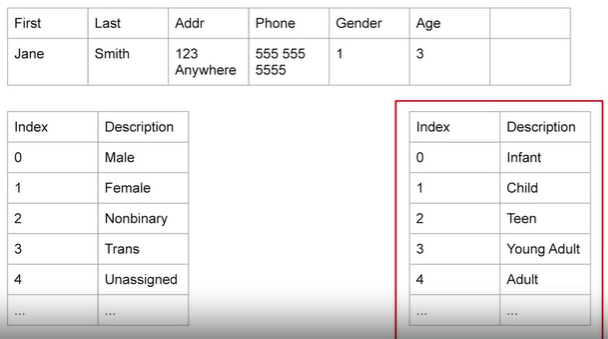

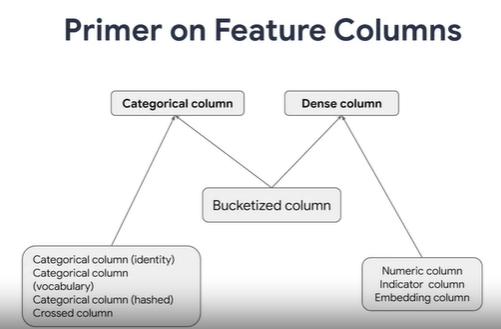

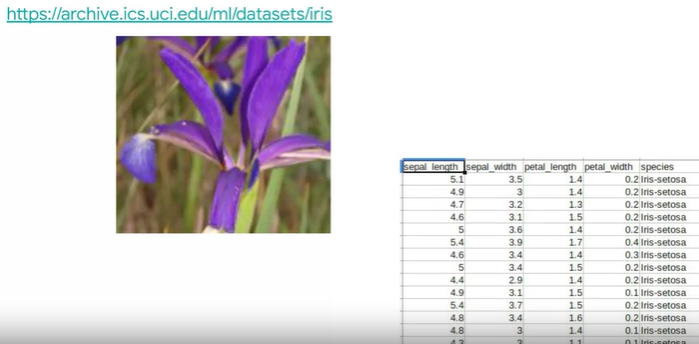

## Penggunaan Numeric Column, Bucketize Column, dan Categorical Identity Column di TensorFlow

### **Numeric Column**
Data ini kemudian dapat direpresentasikan sebagai **numeric column**. Sebagai contoh, dataset untuk **Iris** akan memiliki semua nilai-nilai ini dalam **numeric column**. Anda dapat membaca data dari kolom ini dengan kode berikut. Secara default, tipe data yang digunakan adalah **float32**, namun jika Anda menginginkan presisi lebih tinggi, misalnya **float64**, Anda bisa mengaturnya dengan parameter `dtype`.

#### **Contoh Kode untuk Numeric Column**
```python
import tensorflow as tf

# Menggunakan numeric_column untuk sepal_length
feature_column = tf.feature_column.numeric_column("sepal_length", dtype=tf.float64)

# Contoh dataset Iris
import pandas as pd
iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Menampilkan contoh data
print(iris_data.head())
```
Bucketize Column
Terkadang, Anda tidak hanya ingin satu nilai tetapi juga ingin mengelompokkan nilai ke dalam kategori tertentu. Misalnya, jika kita ingin mewakili tahun pembuatan rumah, kita bisa membaginya dalam beberapa rentang seperti sebelum 1960, setelah 2000, di tahun 1960-an dan 1970-an, atau di tahun 1980-an dan 1990-an. Dalam kasus ini, Anda dapat menggunakan bucketize column untuk membagi data ke dalam beberapa bucket dan menampilkan hasilnya dalam bentuk one-hot encoding.

Contoh Kode untuk Bucketize Column

```python
import tensorflow as tf

# Menentukan batas bucket untuk tahun pembuatan rumah
boundaries = [1960, 2000, 2010, 2020]
bucketized_column = tf.feature_column.bucketized_column(
    tf.feature_column.numeric_column("year_built"), boundaries)

# Contoh data
house_data = pd.DataFrame({
    'year_built': [1955, 1985, 2005, 2015]
})

# Menampilkan bucketized values
print("Bucketized Column:")
print(house_data['year_built'].apply(lambda x: tf.feature_column.bucketized_column(bucketized_column).get(x)))
```

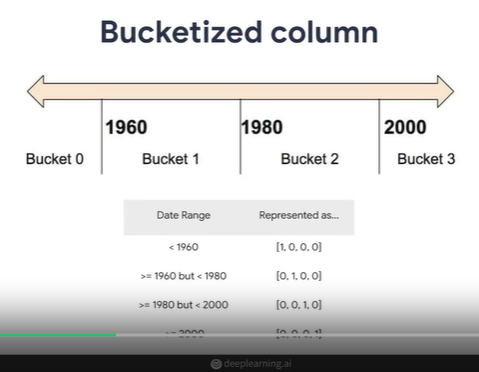

Categorical Identity Column
Kasus khusus dari bucketize column adalah categorical identity column, di mana alih-alih menggunakan rentang, kita dapat menggunakan nilai-nilai yang langsung diwakili dalam one-hot encoding. Misalnya, nilai 0 bisa menjadi [1, 0, 0], 1 menjadi [0, 1, 0], dan seterusnya.

Contoh Kode untuk Categorical Identity Column

```python
import tensorflow as tf

# Membuat categorical column dengan identity
categorical_column = tf.feature_column.categorical_column_with_identity(
    key="my_feature_b", num_buckets=4)

# Menampilkan contoh nilai one-hot encoding
input_data = {
    "my_feature_b": [0, 1, 2, 3]  # Nilai yang berada dalam rentang [0, 3]
}

# Mendefinisikan feature columns
feature_columns = [categorical_column]

# Membuat input function untuk memasukkan data
def input_fn():
    return tf.data.Dataset.from_tensor_slices(input_data)

# Menampilkan hasil encoding one-hot
for example in input_fn():
    print(tf.feature_column.input_layer(example, feature_columns))
```

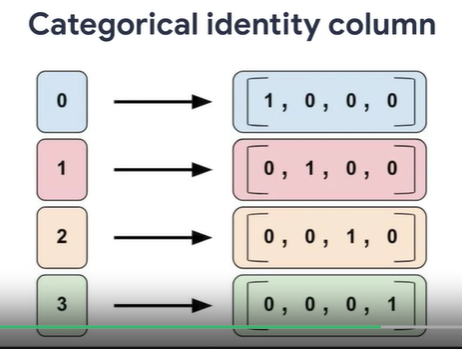

Kesimpulan
Numeric columns digunakan untuk mewakili nilai-nilai numerik yang bisa memiliki berbagai tipe data.
Bucketize columns memungkinkan Anda untuk mengelompokkan nilai ke dalam bucket dengan rentang tertentu dan mewakili hasilnya dalam one-hot encoding.
Categorical identity columns memungkinkan Anda untuk menggunakan nilai-nilai kategori yang langsung diwakili dalam one-hot encoding.

## Penanganan String dengan Categorical Vocabulary Column

Cara yang efektif untuk menangani string jika kita memiliki rentang kata kunci yang tetap adalah dengan menggunakan **categorical vocabulary column**. Kata-kata seperti *kitchenware*, *electronics*, dan *sports* dapat di-*one-hot encode* menjadi array seperti berikut:

- *kitchenware* = [1, 0, 0]
- *electronics* = [0, 1, 0]
- *sports* = [0, 0, 1]

Untuk membuatnya dari sebuah daftar, Anda dapat menentukan daftar kata dengan parameter `vocabulary_list`, kemudian memanggil **categorical column** dengan daftar kosakata tersebut. Jika kata-kata tersebut ada dalam sebuah file, Anda hanya perlu menunjuk parameter `vocabulary_file` ke file tersebut, kemudian tentukan ukuran kosakata yang diinginkan.

Pendekatan ini bekerja dengan baik jika jumlah kategori sedikit, seperti contoh yang kita tunjukkan sebelumnya yang hanya memiliki tiga atau empat kategori.

### Penggunaan Hashing untuk Banyak Kategori

Teknik yang umum digunakan ketika ada banyak kategori adalah dengan melakukan **hashing** untuk mengurangi jumlah kategori menjadi lebih kecil. Tentu saja, Anda harus berhati-hati dengan pendekatan ini karena input yang tidak terkait bisa jadi terpetakan ke kategori yang sama, yang pada akhirnya dapat memiliki arti yang sama bagi **neural network**.

Sebagai contoh, *kitchenware* dan *sports* mungkin keduanya dipetakan ke kategori yang sama setelah hashing, seperti yang terlihat di bawah ini:

(kitchenware, sports) -> category

Ini adalah masalah umum dengan algoritma hashing. Oleh karena itu, pastikan ukuran hash Anda dipertimbangkan dengan hati-hati untuk menghindari terlalu banyak konflik.

### Menggunakan Hashing dalam Kode

Untuk melakukan ini dalam kode, Anda dapat menggunakan **feature column** dengan metode `categorical_column_with_hash_bucket`. Kolom yang di-*hash* ini bisa digunakan untuk mewakili data dengan **hash buckets**. Meskipun algoritma hashing sering kali tampak kontra-intuitif, ternyata hashing sering bekerja dengan baik dalam praktiknya karena kategori hash memberikan model dengan pemisahan tambahan. Model dapat menggunakan fitur tambahan untuk membuat perbedaan tersebut lebih jelas.

### Feature Crossing

Menggabungkan fitur menjadi satu fitur, yang dikenal sebagai **feature crosses**, memungkinkan model untuk mempelajari bobot terpisah untuk setiap kombinasi fitur. Untuk ini, kita akan mempertimbangkan sebuah dataset yang memiliki fitur seperti *latitude* dan *longitude*. Berikut ini adalah contoh bagaimana fitur-fitur tersebut telah di-*bucketized*.

Sekarang mari kita buat **cross column** dengan membuat fitur baru yang menggabungkan *latitude* dan *longitude* ke dalam set fitur. Perhatikan bahwa **crossed column** tidak membangun tabel lengkap dari semua kombinasi yang mungkin, yang bisa sangat besar. Sebaliknya, ini didukung oleh kolom yang di-*hash*, sehingga Anda dapat memilih seberapa besar tabelnya dengan menentukan ukuran **hash bucket**, seperti contoh berikut ini yang menggunakan ukuran 5.000.

### Kesimpulan

Pendekatan **categorical column** dan **feature crossing** ini sangat efektif ketika bekerja dengan dataset yang memiliki banyak kategori atau kombinasi fitur. Dengan mempertimbangkan ukuran hash dan pemilihan kategori dengan hati-hati, model dapat lebih efektif dalam memahami hubungan antar fitur dan memberikan hasil yang lebih baik.

## Kekurangan One-Hot Encoding dan Keunggulan Embedding Columns

Salah satu masalah dengan **one-hot encoded vectors** yang telah Anda lihat sejauh ini adalah bahwa mereka bisa menghasilkan vektor yang sangat besar, jarang (sparse), dan tidak efisien, terutama ketika jumlah kategori yang dihadapi sangat banyak. Vektor-vektor besar seperti ini tidak hanya memakan banyak ruang memori, tetapi juga memperlambat pemrosesan dan pelatihan model. **Embedding columns** adalah solusi yang sangat baik untuk mengatasi masalah ini.

### Perbandingan Antara Indicator Columns dan Embedding Columns

Misalkan kita memiliki nilai input yang terdiri dari berbagai kata dengan ukuran kosakata yang cukup besar, misalnya 81 kata berbeda. Ketika sebuah contoh diproses, salah satu fungsi **categorical feature column** akan memetakan string contoh tersebut ke dalam nilai kategorikal numerik. Sebagai contoh, kata *spoon* bisa dipetakan menjadi nilai numerik, misalnya 32.

- Ketika menggunakan **indicator column**, setiap nilai kategorikal numerik (seperti 32) akan diubah menjadi sebuah vektor yang memiliki 81 elemen. Ini karena kosakata yang kita gunakan terdiri dari 81 kata, sehingga ukuran vektor untuk representasi setiap kata harus sebesar itu. Namun, cara ini menjadi sangat tidak efisien ketika jumlah kategori atau kosakata sangat besar.

- Di sisi lain, **embedding columns** menangani masalah ini dengan cara yang lebih efisien. Alih-alih membuat vektor besar dengan banyak elemen untuk setiap kategori, **embedding column** menggunakan fungsi pemetaan yang mengonversi nilai numerik kategorikal ke dalam indeks dalam sebuah **lookup table**. Dalam tabel ini, setiap entri (setiap kategori) akan memiliki vektor yang lebih kecil, misalnya sebuah vektor tiga elemen yang berisi nilai numerik.

### Bagaimana Penugasan Nilai dalam Vektor Embedding Terjadi

Lalu, bagaimana nilai-nilai dalam vektor **embedding** ini ditugaskan? Ini terjadi selama proses **training** (pelatihan). Selama pelatihan, model akan belajar cara terbaik untuk memetakan nilai numerik kategorikal input ke dalam vektor **embedding** yang sesuai. Proses ini terjadi melalui iterasi, di mana model menyesuaikan bobot vektor embedding untuk mencocokkan hubungan antara kategori-kategori tersebut dengan baik, berdasarkan data pelatihan yang diberikan.

Keuntungan utama dari **embedding columns** adalah bahwa mereka memungkinkan model untuk mempelajari hubungan yang lebih kompleks antara kategori-kategori dari data pelatihan. Misalnya, jika dua kategori sering muncul dalam konteks yang sama dalam data, model dapat belajar untuk memetakan keduanya ke dalam vektor embedding yang saling berdekatan. Dengan cara ini, **embedding columns** meningkatkan kemampuan model dalam mengenali pola yang lebih halus dalam data.

### Kapan Menggunakan Embedding Columns

**Embedding columns** sangat berguna ketika bekerja dengan masalah yang melibatkan data kategorikal dengan banyak kategori. Teknik ini terutama sering digunakan dalam **Natural Language Processing (NLP)**, di mana kata-kata atau frasa dalam bahasa dapat dipetakan ke dalam vektor embedding yang memungkinkan model memahami hubungan semantik antara kata-kata tersebut.

### Bagaimana Menentukan Dimensi untuk Embedding Column

Salah satu pertanyaan penting saat menggunakan **embedding columns** adalah berapa banyak dimensi yang sebaiknya digunakan untuk vektor embedding. Sebagai aturan praktis, jumlah dimensi embedding sebaiknya sebanding dengan akar keempat dari jumlah kategori yang ada. Misalnya, jika Anda memiliki 81 kategori (seperti dalam contoh kata-kata tadi), maka jumlah dimensi embedding yang optimal adalah sekitar 3 dimensi (akar keempat dari 81 adalah sekitar 3).

Untuk menghitung jumlah dimensi secara lebih tepat, Anda dapat menggunakan rumus akar keempat dari jumlah kategori. Dengan demikian, semakin besar jumlah kategori, semakin besar jumlah dimensi yang diperlukan untuk embedding vektornya. Ini memastikan bahwa model memiliki cukup kapasitas untuk memetakan dan memahami perbedaan antara kategori.

### Implementasi Embedding Columns dalam Praktik

Setelah memahami konsep dasar **embedding columns**, langkah berikutnya adalah membuatnya dalam aplikasi nyata. **Embedding columns** tidak hanya mengurangi dimensi secara signifikan dibandingkan **indicator columns**, tetapi juga membuat model lebih fleksibel dan lebih mudah untuk belajar. Ini karena **embedding columns** memungkinkan model untuk mempelajari representasi yang lebih padat dan informatif untuk setiap kategori.

Ketika Anda bekerja dengan **embedding columns**, Anda biasanya akan membuat kolom embedding menggunakan **categorical column** sebagai input. Sebagai contoh, kolom **categorical column** akan memetakan kategori input ke dalam nilai numerik, kemudian nilai-nilai numerik tersebut akan dipetakan lebih lanjut ke dalam vektor embedding yang lebih kecil dan padat.

Setelah vektor embedding tersebut terbentuk, model Anda akan mulai belajar bagaimana cara terbaik untuk mengaitkan vektor-vektor tersebut dengan tugas spesifik yang ingin diselesaikan, seperti klasifikasi teks, prediksi, atau tugas lainnya yang melibatkan data kategorikal.

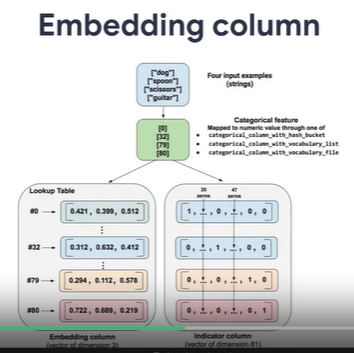

### Keuntungan Menggunakan Embedding Columns

1. **Efisiensi Memori**: Berbeda dengan **indicator columns** yang menghasilkan vektor besar dengan banyak elemen (dan sebagian besar elemen tersebut adalah nol), **embedding columns** menghasilkan vektor yang jauh lebih kecil dan padat. Ini sangat menghemat ruang memori dan mempercepat proses pelatihan model.

2. **Kemampuan Model yang Lebih Baik**: Dengan memetakan kategori ke dalam vektor embedding yang dapat dipelajari, model dapat mengenali hubungan yang lebih kompleks antar kategori. Ini memungkinkan model untuk belajar pola yang lebih mendalam dalam data.

3. **Fleksibilitas dalam Pembelajaran**: Karena **embedding columns** memungkinkan model untuk mempelajari representasi data secara langsung selama pelatihan, model memiliki kebebasan untuk menyesuaikan representasi tersebut untuk tugas tertentu. Ini memberikan fleksibilitas yang lebih besar dibandingkan dengan metode representasi yang lebih statis seperti **one-hot encoding**.

### Kesimpulan

Setelah mempelajari tentang **embedding columns**, Anda kini memiliki pemahaman yang lebih baik tentang cara menangani data kategorikal dengan jumlah kategori yang besar. **Embedding columns** tidak hanya membantu mengurangi dimensi secara signifikan, tetapi juga meningkatkan kemampuan model untuk mengenali hubungan yang lebih kompleks antar kategori, memberikan model lebih banyak informasi untuk dipelajari dan diterapkan pada tugas-tugas yang lebih sulit.

Jika Anda tertarik dengan penerapan **embedding columns** dalam bidang **NLP** atau aplikasi lainnya, Anda dapat mempelajarinya lebih dalam melalui kursus atau dokumentasi terkait seperti yang tersedia di **TensorFlow**.
